Steps 
1. check dataset for nulls 
2. datatypes 
3. correlations 
4. drop correlated and make a note 
5. random forest with all and hyperparameter tuning 
6. compute metrics 
    - score 
    - precision
    - recall
    - f1
    - confusion matrix 
7. dividde features
8. random forest with different features 
9. repeat metrics 
10. moving average 
11. feature selection 
12. fit time-series model?

In [447]:
import pandas as pd
import numpy as np 
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

path = '/Users/aghasaifkhan/Desktop/UChicago/Spring_22/ML_CAPP/Project/crypto-currency/models'

In [448]:
btc_train = pd.read_csv(os.path.join(path, 'bitcoin_train.csv'), index_col = 'Unnamed: 0')
print(btc_train.columns)
print('')
btc_train.head()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Change',
       'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5', 'PROC_10', 'wpr',
       'sto_os', 'goog_trend_score', 'count', 'compound_times_retweets',
       'likes_count', 'neg_times_retweets', 'pos_times_retweets',
       'replies_count', 'retweets_count', 'pos_weighted', 'neg_weighted',
       'compound_weighted', 'count_avg7', 'count_daily_diff',
       'count_weekly_diff', 'replies_count_avg7', 'replies_count_daily_diff',
       'replies_count_weekly_diff', 'retweets_count_avg7',
       'retweets_count_daily_diff', 'retweets_count_weekly_diff',
       'likes_count_avg7', 'likes_count_daily_diff', 'likes_count_weekly_diff',
       'compound_weighted_avg7', 'compound_weighted_daily_diff',
       'compound_weighted_weekly_diff', 'pos_weighted_avg7',
       'pos_weighted_daily_diff', 'pos_weighted_weekly_diff',
       'neg_weighted_avg7', 'neg_weighted_daily_diff',
       'neg_weighted_weekly_diff', 'Daily_Change_Perc

,Date,Open,High,Low,Close,Volume,Daily_Change,Daily_Change_Ind,MACD,PROC_3,PROC_5,PROC_10,wpr,sto_os,goog_trend_score,count,compound_times_retweets,likes_count,neg_times_retweets,pos_times_retweets,replies_count,retweets_count,pos_weighted,neg_weighted,compound_weighted,count_avg7,count_daily_diff,count_weekly_diff,replies_count_avg7,replies_count_daily_diff,replies_count_weekly_diff,retweets_count_avg7,retweets_count_daily_diff,retweets_count_weekly_diff,likes_count_avg7,likes_count_daily_diff,likes_count_weekly_diff,compound_weighted_avg7,compound_weighted_daily_diff,compound_weighted_weekly_diff,pos_weighted_avg7,pos_weighted_daily_diff,pos_weighted_weekly_diff,neg_weighted_avg7,neg_weighted_daily_diff,neg_weighted_weekly_diff,Daily_Change_Perc,RSI,Weekly_Change,Weekly_Change_Perc,streak,Close/Last_Gold,Open_Gold,Daily_Change_Gold,Daily_Change_Perc_Gold,Increased_Gold,RSI_Gold,Close/Last_SP500,Open_SP500,Daily_Change_SP500,Daily_Change_Perc_SP500,Increased_SP500,RSI_SP500,label
268,2015-11-30,371.437012,382.363007,370.382996,377.321014,71701600,6.027008,1.0,10.296558,0.053846,0.149647,0.171724,11.760471,111.760471,40,9,78.9070,194,1.066,31.446,16,187,0.168160,0.005701,0.421963,8.714286,-5.0,0.285714,7.142857,12.0,8.857143,550.142857,-1808.0,-363.142857,363.571429,-955.0,-169.571429,0.165505,1.165009,0.256457,0.121995,0.167491,0.046165,0.056177,-0.381836,-0.050476,0.016226,67.293663,54.307006,0.168126,4.0,1065.3,1056.0,9.3,0.008807,1,33.968948,2080.41,2090.95,-10.54,-0.005041,0,57.384705,0.0
1016,2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,7032140000,-90.320313,0.0,-121.126607,-0.113516,-0.118765,-0.120198,-111.407104,-11.407104,66,220,3205.9199,22188,160.507,898.226,1851,8883,0.101117,0.018069,0.360905,184.428571,-26.0,35.571429,1607.142857,-480.0,243.857143,6716.571429,-143.0,2166.428571,13486.142857,2783.0,8701.857143,0.354006,-0.017332,0.006899,0.114998,-0.010991,-0.013881,0.022502,-0.008368,-0.004433,-0.015746,21.832725,-794.570313,-0.123331,-6.0,1215.0,1211.8,3.2,0.002641,1,48.296230,2730.20,2693.52,36.68,0.013618,1,59.599184,0.0
1144,2019-05-23,7677.269043,7943.791504,7533.196777,7881.846680,24457107820,201.780274,1.0,625.729133,-0.012091,0.083980,0.008565,-15.922144,84.077856,42,202,2749.0199,15515,117.530,804.580,1980,5690,0.141402,0.020656,0.483132,197.285714,-25.0,4.714286,2410.857143,585.0,-430.857143,5502.142857,1277.0,187.857143,16052.714286,2259.0,-537.714286,0.405208,0.049369,0.077924,0.120774,0.009586,0.020628,0.021440,-0.005431,-0.000784,0.026283,69.922412,-5.079101,-0.000644,1.0,1291.0,1278.5,12.5,0.009777,1,53.162762,2822.24,2836.70,-14.46,-0.005097,0,41.547984,1.0
1082,2019-02-25,3807.002441,3913.707275,3807.002441,3882.696289,9318796067,72.268799,1.0,94.876946,-0.030665,-0.029282,0.072328,-49.430713,50.569287,86,166,1386.6207,12832,85.748,414.318,1258,4128,0.100368,0.020772,0.335906,161.000000,22.0,5.000000,1597.000000,106.0,-339.000000,3778.857143,1501.0,349.142857,11549.714286,4084.0,1282.285714,0.309382,0.029585,0.026524,0.103451,-0.010674,-0.003083,0.024264,-0.018495,-0.003492,0.018983,57.364686,-28.965332,-0.007405,2.0,1329.5,1331.9,-2.4,-0.001802,0,58.979842,2796.11,2804.35,-8.24,-0.002938,0,45.563129,0.0
1149,2019-05-31,8320.286133,8586.659180,8172.550781,8574.501953,25365190957,255.029297,1.0,608.732748,-0.016681,-0.011381,0.076749,-15.071083,84.928917,50,156,2124.9631,9243,91.945,581.619,1197,4709,0.123512,0.019525,0.451256,202.285714,-42.0,-46.285714,2200.714286,-459.0,-1003.714286,5598.857143,474.0,-889.857143,15293.857143,-4869.0,-6050.857143,0.427829,0.096138,0.023426,0.129241,-0.012968,-0.005729,0.020574,-0.012921,-0.001048,0.030652,70.448089,692.806640,0.087901,1.0,1311.1,1293.2,17.9,0.013842,1,63.288965,2752.06,2766.15,-14.09,-0.005094,0,20.448755,0.0


# Exploratory Data Analysis

In [449]:
btc_train.dtypes

Date                              object
Open                             float64
High                             float64
Low                              float64
Close                            float64
Volume                             int64
Daily_Change                     float64
Daily_Change_Ind                 float64
MACD                             float64
PROC_3                           float64
PROC_5                           float64
PROC_10                          float64
wpr                              float64
sto_os                           float64
goog_trend_score                   int64
count                              int64
compound_times_retweets          float64
likes_count                        int64
neg_times_retweets               float64
pos_times_retweets               float64
replies_count                      int64
retweets_count                     int64
pos_weighted                     float64
neg_weighted                     float64
compound_weighte

In [450]:
btc_train.isnull().sum()

Date                             0
Open                             0
High                             0
Low                              0
Close                            0
Volume                           0
Daily_Change                     0
Daily_Change_Ind                 0
MACD                             0
PROC_3                           0
PROC_5                           0
PROC_10                          0
wpr                              0
sto_os                           0
goog_trend_score                 0
count                            0
compound_times_retweets          0
likes_count                      0
neg_times_retweets               0
pos_times_retweets               0
replies_count                    0
retweets_count                   0
pos_weighted                     0
neg_weighted                     0
compound_weighted                0
count_avg7                       0
count_daily_diff                 0
count_weekly_diff                0
replies_count_avg7  

# Financial features 

Fitting a baseline Random Forest model using only the financial features

In [451]:
# Using finanical features only first 


fin_features_lst = ['MACD', 'PROC_3', 'PROC_10', 'wpr', 'sto_os', 'Daily_Change_Perc', 'Daily_Change_Perc_Gold', \
                'Daily_Change_SP500', 'RSI']

btc_fin_train = btc_train[fin_features_lst]
btc_fin_train.head()

,MACD,PROC_3,PROC_10,wpr,sto_os,Daily_Change_Perc,Daily_Change_Perc_Gold,Daily_Change_SP500,RSI
268,10.296558,0.053846,0.171724,11.760471,111.760471,0.016226,0.008807,-10.54,67.293663
1016,-121.126607,-0.113516,-0.120198,-111.407104,-11.407104,-0.015746,0.002641,36.68,21.832725
1144,625.729133,-0.012091,0.008565,-15.922144,84.077856,0.026283,0.009777,-14.46,69.922412
1082,94.876946,-0.030665,0.072328,-49.430713,50.569287,0.018983,-0.001802,-8.24,57.364686
1149,608.732748,-0.016681,0.076749,-15.071083,84.928917,0.030652,0.013842,-14.09,70.448089


In [452]:
# Find correlations 
btc_fin_train.corr()

,MACD,PROC_3,PROC_10,wpr,sto_os,Daily_Change_Perc,Daily_Change_Perc_Gold,Daily_Change_SP500,RSI
MACD,1.000000,0.192118,0.475475,0.266930,0.266930,0.071249,-0.035243,0.043987,0.539179
PROC_3,0.192118,1.000000,0.585475,0.627979,0.627979,0.590778,0.052800,0.065826,0.510222
PROC_10,0.475475,0.585475,1.000000,0.691064,0.691064,0.342134,0.036876,0.098655,0.744366
wpr,0.266930,0.627979,0.691064,1.000000,1.000000,0.544168,0.032950,0.151656,0.706751
sto_os,0.266930,0.627979,0.691064,1.000000,1.000000,0.544168,0.032950,0.151656,0.706751
Daily_Change_Perc,0.071249,0.590778,0.342134,0.544168,0.544168,1.000000,0.074008,0.164289,0.313829
Daily_Change_Perc_Gold,-0.035243,0.052800,0.036876,0.032950,0.032950,0.074008,1.000000,-0.027883,0.005440
Daily_Change_SP500,0.043987,0.065826,0.098655,0.151656,0.151656,0.164289,-0.027883,1.000000,0.066367
RSI,0.539179,0.510222,0.744366,0.706751,0.706751,0.313829,0.005440,0.066367,1.000000


In [453]:
def predict_coin(rf_model, features, df, rv_on = False, plot_cm = False):
    '''
    Fits a Random Forest model to predict whether the price of bitcoin will go up or down
    Inputs:
        rf_model: the random forest model
        features: list of features to use
    Returns: 
         yhat: predictions  
    '''
    
    X = df[features]
    y = df['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1234)
    
    rf_model.fit(X_train, y_train)

    yhat_train = rf_model.predict(X_train)
    yhat_test = rf_model.predict(X_test)
    
    # train metrics
    # accuracy
    acc_score_train  = accuracy_score(y_train, yhat_train)
    # precision
    prec_score_train  = precision_score(y_train, yhat_train)
    # recall
    recall_train  = accuracy_score(y_train, yhat_train)
    # f1
    f1_train = f1_score(y_train, yhat_train)
    
    # test metrics
    # accuracy
    acc_score_test  = accuracy_score(y_test, yhat_test)
    # precision
    prec_score_test  = precision_score(y_test, yhat_test)
    # recall
    recall_test  = recall_score(y_test, yhat_test)
    # f1
    f1_test = f1_score(y_test, yhat_test)
    
    if plot_cm:
        cm = confusion_matrix(y_test, yhat_test, labels = [1, 0])
        disp = ConfusionMatrixDisplay(cm, display_labels = [1, 0])
        disp.plot()
        plt.show()
    
    if not rv_on:
        print('TRAIN ACCURACY: ', acc_score_train)
        print('')
        print('TEST ACCURACY: ', acc_score_test)
        print('')
        print('TRAIN PRECISION: ', prec_score_train)
        print('')
        print('TEST PRECISION: ', prec_score_test)
        print('')
        print('TRAIN RECALL: ', recall_train)
        print('')
        print('TEST RECALL: ', recall_test)
        print('')
        print('TRAIN F1: ', f1_train)
        print('')
        print('TEST F1: ', f1_test)
    else:
        rv_dict = {'train_acc':acc_score_train, 'test_acc':acc_score_test, 'train_precision':prec_score_train, 
                   'test_precision': prec_score_test,
                  'train_recall':recall_train, 'test_recall':recall_test, 'train_f1': f1_train,
                  'test_f1': f1_test}
        return rv_dict    

In [454]:
rf_baseline = RandomForestClassifier(random_state = 1234)
predict_coin(rf_baseline, fin_features_lst, btc_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.5608974358974359

TRAIN PRECISION:  1.0

TEST PRECISION:  0.5904255319148937

TRAIN RECALL:  1.0

TEST RECALL:  0.6491228070175439

TRAIN F1:  1.0

TEST F1:  0.6183844011142061


# Fit baseline model and fincancial indicators to dogecoin

I will use the same baseline model to predict on the dogecoin dataset, using only financial features

In [455]:
# read in doge dataset 

doge_train = pd.read_csv(os.path.join(path, 'dogecoin_train.csv'), index_col = 'Unnamed: 0')
print(doge_train.columns)
print('')
doge_train.head()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close**', 'Volume',
       'Daily_Change', 'Daily_Change_Ind', 'MACD', 'PROC_3', 'PROC_5',
       'PROC_10', 'wpr', 'sto_os', 'Daily_Change_Perc', 'Weekly_Change',
       'Weekly_Change_Perc', 'RSI', 'streak', 'Close/Last_Gold', 'Open_Gold',
       'Daily_Change_Gold', 'Daily_Change_Perc_Gold', 'Increased_Gold',
       'RSI_Gold', 'Close/Last_SP500', 'Open_SP500', 'Daily_Change_SP500',
       'Daily_Change_Perc_SP500', 'Increased_SP500', 'RSI_SP500', 'label',
       'count', 'compound', 'compound_times_retweets', 'likes_count', 'neg',
       'neg_times_retweets', 'neu', 'pos', 'pos_times_retweets',
       'replies_count', 'retweets_count', 'pos_weighted', 'neg_weighted',
       'compound_weighted', 'count_avg7', 'count_daily_diff',
       'count_weekly_diff', 'replies_count_avg7', 'replies_count_daily_diff',
       'replies_count_weekly_diff', 'retweets_count_avg7',
       'retweets_count_daily_diff', 'retweets_count_weekly_diff',
   

,Date,Open,High,Low,Close,Adj Close**,Volume,Daily_Change,Daily_Change_Ind,MACD,PROC_3,PROC_5,PROC_10,wpr,sto_os,Daily_Change_Perc,Weekly_Change,Weekly_Change_Perc,RSI,streak,Close/Last_Gold,Open_Gold,Daily_Change_Gold,Daily_Change_Perc_Gold,Increased_Gold,RSI_Gold,Close/Last_SP500,Open_SP500,Daily_Change_SP500,Daily_Change_Perc_SP500,Increased_SP500,RSI_SP500,label,count,compound,compound_times_retweets,likes_count,neg,neg_times_retweets,neu,pos,pos_times_retweets,replies_count,retweets_count,pos_weighted,neg_weighted,compound_weighted,count_avg7,count_daily_diff,count_weekly_diff,replies_count_avg7,replies_count_daily_diff,replies_count_weekly_diff,retweets_count_avg7,retweets_count_daily_diff,retweets_count_weekly_diff,likes_count_avg7,likes_count_daily_diff,likes_count_weekly_diff,compound_weighted_avg7,compound_weighted_daily_diff,compound_weighted_weekly_diff,pos_weighted_avg7,pos_weighted_daily_diff,pos_weighted_weekly_diff,neg_weighted_avg7,neg_weighted_daily_diff,neg_weighted_weekly_diff,goog_trend_score
1528,2020-11-05,0.0025,0.0026,0.0025,0.0026,0.0026,"31,611,962",0.0001,1,-3.175818e-05,0.040000,0.000000,-0.037037,-50.000000,50.000000,0.040000,0.0000,0.000000,48.459280,1.0,1946.8,1903.4,43.4,0.022801,1,59.358919,3510.45,3485.74,24.71,0.007089,1,33.935062,1.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7
1185,2019-06-28,0.0033,0.0035,0.0033,0.0035,0.0035,"65,310,777",0.0002,1,8.710489e-05,0.029412,0.060606,0.129032,33.333333,133.333333,0.060606,0.0003,0.093750,67.470578,1.0,1409.7,1413.3,-3.6,-0.002547,0,76.474452,2941.76,2932.94,8.82,0.003007,1,42.528245,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34
685,2017-07-03,0.0025,0.0026,0.0024,0.0025,0.0025,"7,488,410",0.0000,0,-1.052540e-04,-0.038462,-0.107143,-0.193548,-100.000000,0.000000,0.000000,-0.0005,-0.166667,39.155653,-5.0,1219.2,1220.1,-0.9,-0.000738,0,31.395415,2429.01,2431.39,-2.38,-0.000979,0,38.660017,1.0,3.0,0.796400,57.3408,33.0,0.0,0.0,0.6470,0.3530,25.416,12.0,72.0,0.353000,0.0,0.796400,2.142857,2.0,0.857143,14.000000,-18.0,-2.000000,159.428571,-9.0,-87.428571,123.428571,-10.0,-90.428571,0.417486,0.285800,0.378914,0.161105,0.217000,0.191895,0.010857,0.0,-0.010857,49
1054,2018-12-19,0.0027,0.0028,0.0026,0.0027,0.0027,"29,874,095",0.0000,0,-3.705615e-05,0.285714,0.285714,0.285714,-0.000000,100.000000,0.000000,0.0006,0.285714,67.371684,-1.0,1256.4,1253.5,2.9,0.002314,1,63.083949,2506.96,2547.05,-40.09,-0.015740,0,45.040922,0.0,5.0,0.751200,24.7632,123.0,0.0,0.0,0.7838,0.2162,7.053,3.0,33.0,0.213727,0.0,0.750400,2.428571,4.0,2.571429,7.142857,2.0,-4.142857,19.142857,20.0,13.857143,76.000000,86.0,47.000000,0.000000,0.041600,0.000000,0.000000,0.040727,0.000000,0.000000,0.0,0.000000,75
1112,2019-03-15,0.0020,0.0021,0.0020,0.0020,0.0020,"14,469,793",0.0000,0,-3.519148e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,49.473959,-21.0,1302.9,1295.6,7.3,0.005634,1,49.442723,2822.48,2810.79,11.69,0.004159,1,41.766475,0.0,4.0,0.763325,394.6624,625.0,0.0,0.0,0.7105,0.2895,138.960,175.0,442.0,0.314389,0.0,0.892901,2.571429,1.0,1.428571,31.285714,154.0,143.714286,95.714286,424.0,346.285714,188.428571,523.0,436.571429,0.359029,0.892901,0.533873,0.119770,0.314389,0.194619,0.000000,0.0,0.000000,62


In [456]:
doge_fin = doge_train[fin_features_lst]
doge_fin.dtypes

MACD                      float64
PROC_3                    float64
PROC_10                   float64
wpr                       float64
sto_os                    float64
Daily_Change_Perc         float64
Daily_Change_Perc_Gold    float64
Daily_Change_SP500        float64
RSI                       float64
dtype: object

In [457]:
doge_fin.isnull().sum()

MACD                      0
PROC_3                    0
PROC_10                   0
wpr                       0
sto_os                    0
Daily_Change_Perc         0
Daily_Change_Perc_Gold    0
Daily_Change_SP500        0
RSI                       0
dtype: int64

In [458]:
doge_fin.corr()

,MACD,PROC_3,PROC_10,wpr,sto_os,Daily_Change_Perc,Daily_Change_Perc_Gold,Daily_Change_SP500,RSI
MACD,1.000000,0.094877,0.395723,0.088921,0.166279,0.035771,-0.027179,0.038564,0.214288
PROC_3,0.094877,1.000000,0.457046,0.431167,0.470637,0.513133,0.033403,0.021528,0.484359
PROC_10,0.395723,0.457046,1.000000,0.368689,0.448808,0.218243,-0.009322,0.077002,0.531643
wpr,0.088921,0.431167,0.368689,1.000000,0.648977,0.339516,0.055962,0.109651,0.552828
sto_os,0.166279,0.470637,0.448808,0.648977,1.000000,0.379348,0.042102,0.103416,0.600332
Daily_Change_Perc,0.035771,0.513133,0.218243,0.339516,0.379348,1.000000,0.035055,0.077657,0.270596
Daily_Change_Perc_Gold,-0.027179,0.033403,-0.009322,0.055962,0.042102,0.035055,1.000000,-0.009050,0.021378
Daily_Change_SP500,0.038564,0.021528,0.077002,0.109651,0.103416,0.077657,-0.009050,1.000000,0.051451
RSI,0.214288,0.484359,0.531643,0.552828,0.600332,0.270596,0.021378,0.051451,1.000000


In [459]:
# Fit model 

predict_coin(rf_baseline, fin_features_lst, doge_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.7896341463414634

TRAIN PRECISION:  1.0

TEST PRECISION:  0.46153846153846156

TRAIN RECALL:  1.0

TEST RECALL:  0.1791044776119403

TRAIN F1:  1.0

TEST F1:  0.25806451612903225


# Bitcoin using social indicators 

Now I will prredict on the Bitocin dataset using only social indicators 

In [460]:
features_soc_lst = [ 'goog_trend_score', 'retweets_count', 'replies_count', 'compound_weighted', 
                    'compound_weighted_avg7', 'compound_weighted_daily_diff' , 'compound_weighted_weekly_diff',
                'replies_count_daily_diff', 'replies_count_avg7', 'replies_count_weekly_diff', 'count', 
                    'count_daily_diff', 'count_weekly_diff']


# make predictions and get metrics 
predict_coin(rf_baseline, features_soc_lst, btc_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.48717948717948717

TRAIN PRECISION:  1.0

TEST PRECISION:  0.5287958115183246

TRAIN RECALL:  1.0

TEST RECALL:  0.5906432748538012

TRAIN F1:  1.0

TEST F1:  0.5580110497237568


# Doge using social indicators 

Repeat the process for dogecoin

In [461]:
predict_coin(rf_baseline, features_soc_lst, doge_train)

TRAIN ACCURACY:  0.8950050968399592

TEST ACCURACY:  0.774390243902439

TRAIN PRECISION:  0.9313725490196079

TEST PRECISION:  0.1111111111111111

TRAIN RECALL:  0.8950050968399592

TEST RECALL:  0.014925373134328358

TRAIN F1:  0.6484641638225256

TEST F1:  0.026315789473684213


# More feature selection 

After doing some analysis of correlations, we dropped some features and kept the rest and are now going to repeat the process of fitting the baseline model on these new set of social, financial and combined features 

In [462]:
# BITCOIN FINANCIAL 

financial_features_final = ['RSI', 'RSI_Gold', 'RSI_SP500', 'Daily_Change_Perc_SP500',\
                            'Daily_Change_Perc_Gold','wpr', 'MACD', 'PROC_3', 'streak']

predict_coin(rf_baseline, financial_features_final, btc_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.5416666666666666

TRAIN PRECISION:  1.0

TEST PRECISION:  0.5721649484536082

TRAIN RECALL:  1.0

TEST RECALL:  0.6491228070175439

TRAIN F1:  1.0

TEST F1:  0.6082191780821917


In [463]:
# BITCOIN SOCIAL 

sentiment_features_final = ['compound_weighted_avg7', 'compound_weighted', 'likes_count_daily_diff', 
                            'retweets_count_weekly_diff', 'likes_count_avg7', 'goog_trend_score',
                            'neg_weighted', 'neg_weighted_avg7', 'pos_weighted_weekly_diff']

predict_coin(rf_baseline, sentiment_features_final, btc_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.47115384615384615

TRAIN PRECISION:  1.0

TEST PRECISION:  0.5164835164835165

TRAIN RECALL:  1.0

TEST RECALL:  0.5497076023391813

TRAIN F1:  1.0

TEST F1:  0.5325779036827196


In [464]:
# BITCOIN ALL

combined = ['RSI', 'RSI_Gold', 'RSI_SP500', 'Daily_Change_Perc_SP500', 'Daily_Change_Perc_Gold', 'wpr', 
            'MACD', 'PROC_3', 'streak', 'compound_weighted_avg7', 'compound_weighted', 
            'likes_count_daily_diff', 'retweets_count_weekly_diff', 'likes_count_avg7', 'goog_trend_score', 
            'neg_weighted', 'neg_weighted_avg7', 'pos_weighted_weekly_diff']


predict_coin(rf_baseline, combined, btc_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.5352564102564102

TRAIN PRECISION:  1.0

TEST PRECISION:  0.5691489361702128

TRAIN RECALL:  1.0

TEST RECALL:  0.6257309941520468

TRAIN F1:  1.0

TEST F1:  0.5961002785515321


In [465]:
# DOGECOIN FINANCIAL

predict_coin(rf_baseline, financial_features_final, doge_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.801829268292683

TRAIN PRECISION:  1.0

TEST PRECISION:  0.5333333333333333

TRAIN RECALL:  1.0

TEST RECALL:  0.23880597014925373

TRAIN F1:  1.0

TEST F1:  0.32989690721649484


In [466]:
# DOGECOIN SOCIAL 

predict_coin(rf_baseline, sentiment_features_final, doge_train)

TRAIN ACCURACY:  0.8950050968399592

TEST ACCURACY:  0.7804878048780488

TRAIN PRECISION:  0.9313725490196079

TEST PRECISION:  0.14285714285714285

TRAIN RECALL:  0.8950050968399592

TEST RECALL:  0.014925373134328358

TRAIN F1:  0.6484641638225256

TEST F1:  0.02702702702702703


In [467]:
# DOGECOIN ALL

predict_coin(rf_baseline, combined, doge_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.823170731707317

TRAIN PRECISION:  1.0

TEST PRECISION:  0.68

TRAIN RECALL:  1.0

TEST RECALL:  0.2537313432835821

TRAIN F1:  1.0

TEST F1:  0.3695652173913044


Thhe financial features seem to be doing the best job so far 

# Hyperparameter tuning using grid search

In [468]:
param_grid = [{'n_estimators': [10, 20, 40, 60, 80, 100]}, {'max_features': ['sqrt', 'log2', None]},
              {'oob_score': [True, False]}, {'criterion' :['gini', 'entropy']}]

grid_search_rf = GridSearchCV(rf_baseline, param_grid, cv = 5, scoring = 'accuracy')

x_df = btc_train[fin_features_lst]
y = btc_train['label']
grid_search_rf.fit(x_df, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [469]:
print('best hyperparameters: ', grid_search_rf.best_params_)

best hyperparameters:  {'n_estimators': 80}


# Fit model using best hyperpaprameters

In [470]:
rf_hp = RandomForestClassifier(random_state = 1234, n_estimators = 80)

feat_dict_of_lists = {'fin_feat': fin_features_lst, 'soc_feat':features_soc_lst, 'fin_david_lst': financial_features_final,
                      'soc_david_lst': sentiment_features_final, 'combined': combined}

coins_dict = {'bitcoin': btc_train, 'dogecoin':doge_train}

all_coins_metrics_dict = {}

for coin_name, coin_df in coins_dict.items():
    if coin_name not in all_coins_metrics_dict:
        all_coins_metrics_dict[coin_name] = []
    for name, feat_lst in feat_dict_of_lists.items():
        metrics_dict = predict_coin(rf_hp, feat_lst, coin_df, rv_on = True)
        all_coins_metrics_dict[coin_name].append({name: metrics_dict})
        
                      

In [471]:
all_coins_metrics_dict

{'bitcoin': [{'fin_feat': {'train_acc': 1.0,
    'test_acc': 0.5705128205128205,
    'train_precision': 1.0,
    'test_precision': 0.6010928961748634,
    'train_recall': 1.0,
    'test_recall': 0.6432748538011696,
    'train_f1': 1.0,
    'test_f1': 0.6214689265536724}},
  {'soc_feat': {'train_acc': 1.0,
    'test_acc': 0.48717948717948717,
    'train_precision': 1.0,
    'test_precision': 0.5294117647058824,
    'train_recall': 1.0,
    'test_recall': 0.5789473684210527,
    'train_f1': 1.0,
    'test_f1': 0.5530726256983242}},
  {'fin_david_lst': {'train_acc': 1.0,
    'test_acc': 0.5288461538461539,
    'train_precision': 1.0,
    'test_precision': 0.5659340659340659,
    'train_recall': 1.0,
    'test_recall': 0.6023391812865497,
    'train_f1': 1.0,
    'test_f1': 0.5835694050991501}},
  {'soc_david_lst': {'train_acc': 1.0,
    'test_acc': 0.4519230769230769,
    'train_precision': 1.0,
    'test_precision': 0.5,
    'train_recall': 1.0,
    'test_recall': 0.52046783625731,
    '

As seen earlier, financial features are doing the best job with a test accuracy of around 57% after hyperparameter tuning. 
However, I will do some more feature selection using forward stepwise selection

# Forward Stepwise Selection

Will start with a list of all financial and social features 

In [472]:
all_features = list(set(fin_features_lst + financial_features_final + combined))

In [473]:
def forward_selection(rf_model, df, features_lst):
    '''
    Given a tuned random forest model, uses forward selection to
    select the best features.
    Inputs:
        rf_model: a tuned random forest object
        df: dataframe to be used
        features_lst: a list of all features to be used 
    Returns:
        A tuple of best features and the corresponding accuracy.
    '''

    best_features_lst = []
    best_objects_lst = []

    for _ in features_lst:
        best_acc = 0
        for feat in features_lst:
            feat_lst = best_features_lst.copy()
            if feat not in feat_lst:
                feat_lst = feat_lst + [feat]
                rv = predict_coin(rf_model, feat_lst, df, rv_on = True)
                test_acc = rv['test_acc']
                if test_acc > best_acc:
                    best_acc = test_acc
                    best_features = feat_lst
        best_features_lst = list(set(best_features_lst + best_features))

    return (best_features_lst, best_acc)

In [474]:
# BITCOIN 
best_features, acc = forward_selection(rf_hp, btc_train, all_features)
print("Accuracy from all financial and combined features: ", acc)
print('')
best_features

Accuracy from all financial and combined features:  0.49038461538461536



['PROC_3',
 'wpr',
 'compound_weighted_avg7',
 'Daily_Change_Perc_Gold',
 'RSI_SP500',
 'neg_weighted_avg7',
 'pos_weighted_weekly_diff',
 'streak',
 'goog_trend_score',
 'compound_weighted',
 'RSI',
 'Daily_Change_Perc_SP500',
 'MACD',
 'Daily_Change_Perc',
 'likes_count_daily_diff',
 'RSI_Gold',
 'sto_os',
 'likes_count_avg7',
 'Daily_Change_SP500',
 'PROC_10',
 'retweets_count_weekly_diff',
 'neg_weighted']

In [475]:
all_fin_features = list(set(fin_features_lst + financial_features_final))
                        
best_features, acc = forward_selection(rf_hp, btc_train, all_fin_features)
print("Accuracy from all financial features: ", acc)
print('')
best_features

Accuracy from all financial features:  0.5192307692307693



['streak',
 'sto_os',
 'Daily_Change_Perc_Gold',
 'PROC_3',
 'RSI',
 'wpr',
 'Daily_Change_SP500',
 'RSI_SP500',
 'PROC_10',
 'Daily_Change_Perc_SP500',
 'MACD',
 'Daily_Change_Perc',
 'RSI_Gold']

After doing some manual analysis, I have selected the following set of features 

In [476]:
keep_feats = ['streak',
 'sto_os',
 'PROC_3',
 'RSI',
 'wpr',
 'RSI_SP500',
 'PROC_10',
 'Daily_Change_SP500',
 'MACD']
predict_coin(rf_hp, keep_feats, btc_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.5576923076923077

TRAIN PRECISION:  1.0

TEST PRECISION:  0.5901639344262295

TRAIN RECALL:  1.0

TEST RECALL:  0.631578947368421

TRAIN F1:  1.0

TEST F1:  0.6101694915254237


# Feature Importance 

Now, I'll use the feature_importances to select the best features

In [477]:
# FEATURE IMPORTANCE

def get_feat_imp(rf_model, features, df):
    '''
    
    '''
    X = df[features]
    y = df['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1234)

    rf_model.fit(X_train, y_train)

    feature_import = rf_model.feature_importances_

    important_features_dict = {}

    for idx, val in enumerate(rf_model.feature_importances_):
        feat_name = features[idx]
        important_features_dict[feat_name] = val

    print(dict(sorted(important_features_dict.items(), key=lambda item: item[1])))

In [478]:
# Feature importance for bitcoin on all the features selected from forward stepwise selection 

get_feat_imp(rf_hp, keep_feats, btc_train)

{'streak': 0.05982800943112451, 'sto_os': 0.09796048349052663, 'wpr': 0.0985886490317324, 'PROC_3': 0.11278664998455093, 'PROC_10': 0.11658037294926299, 'RSI_SP500': 0.12476106088343573, 'RSI': 0.12549611364623176, 'Daily_Change_SP500': 0.12707903442930288, 'MACD': 0.13691962615383224}


In [479]:
# Only social features 
all_soc_feat = list(set(features_soc_lst + sentiment_features_final))

get_feat_imp(rf_hp, all_soc_feat, btc_train)

{'count': 0.041893218742623445, 'replies_count': 0.0434102909697632, 'neg_weighted': 0.046360466946905814, 'count_daily_diff': 0.048249329677046635, 'retweets_count': 0.04847656794081474, 'replies_count_avg7': 0.048673196532099304, 'pos_weighted_weekly_diff': 0.05089308420945986, 'replies_count_weekly_diff': 0.05095001336692215, 'goog_trend_score': 0.05144947157193089, 'retweets_count_weekly_diff': 0.05172042389392005, 'likes_count_avg7': 0.05179992608989985, 'replies_count_daily_diff': 0.05231608518561785, 'compound_weighted_daily_diff': 0.052926705710038886, 'count_weekly_diff': 0.05553155578643995, 'compound_weighted_weekly_diff': 0.05571170025062274, 'likes_count_daily_diff': 0.0564334947241787, 'neg_weighted_avg7': 0.0629329181826735, 'compound_weighted': 0.06502794243373411, 'compound_weighted_avg7': 0.0652436077853084}


In [480]:
final_feat_lst = keep_feats + ['replies_count', 'goog_trend_score', 'compound_weighted_weekly_diff',
                                   'neg_weighted', 'replies_count_avg7', 'likes_count_avg7', 'count_weekly_diff',
                              'retweets_count_weekly_diff', 'count', 'likes_count_daily_diff', 
                              'replies_count_weekly_diff']

predict_coin(rf_hp, keep_feats, btc_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.5576923076923077

TRAIN PRECISION:  1.0

TEST PRECISION:  0.5901639344262295

TRAIN RECALL:  1.0

TEST RECALL:  0.631578947368421

TRAIN F1:  1.0

TEST F1:  0.6101694915254237


In [481]:
get_feat_imp(rf_hp, fin_features_lst, btc_train)

{'sto_os': 0.09116930995796199, 'wpr': 0.09146218647071172, 'Daily_Change_Perc': 0.10096364261817829, 'PROC_3': 0.11368010620249895, 'Daily_Change_Perc_Gold': 0.11374487360980619, 'PROC_10': 0.11662582091296816, 'RSI': 0.11688654256509826, 'Daily_Change_SP500': 0.12180916867771005, 'MACD': 0.13365834898506648}


In [482]:
predict_coin(rf_hp, fin_features_lst, btc_train)

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.5705128205128205

TRAIN PRECISION:  1.0

TEST PRECISION:  0.6010928961748634

TRAIN RECALL:  1.0

TEST RECALL:  0.6432748538011696

TRAIN F1:  1.0

TEST F1:  0.6214689265536724


In [483]:
final_features_btc = fin_features_lst

In [484]:
predict_coin(rf_hp, combined, doge_train)

final_features_doge = combined

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.8140243902439024

TRAIN PRECISION:  1.0

TEST PRECISION:  0.6153846153846154

TRAIN RECALL:  1.0

TEST RECALL:  0.23880597014925373

TRAIN F1:  1.0

TEST F1:  0.3440860215053763


# Final features

We finally choose the following features
1. Bitcoin: For bitcoin, we find finncial indicators to be performing the best so we only use those
2. Dogecoin: For dogecoin, both financiala nd social indicators are performing we so we use both 

# Plotting 

After selecting features, now I am checking the predicted labels using a confusion matrix 

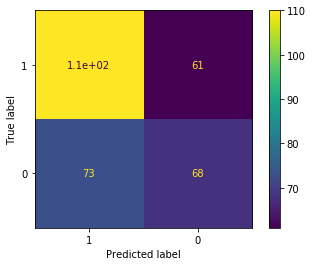

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.5705128205128205

TRAIN PRECISION:  1.0

TEST PRECISION:  0.6010928961748634

TRAIN RECALL:  1.0

TEST RECALL:  0.6432748538011696

TRAIN F1:  1.0

TEST F1:  0.6214689265536724


In [485]:
# PLOT CONFUSION MATRIX FOR BITCOIN 

predict_coin(rf_hp, final_features_btc, btc_train, plot_cm = True)


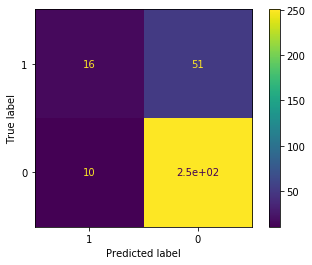

TRAIN ACCURACY:  1.0

TEST ACCURACY:  0.8140243902439024

TRAIN PRECISION:  1.0

TEST PRECISION:  0.6153846153846154

TRAIN RECALL:  1.0

TEST RECALL:  0.23880597014925373

TRAIN F1:  1.0

TEST F1:  0.3440860215053763


In [486]:
# PLOT CONFUSION MATRIX FOR DOGECOIN 

predict_coin(rf_hp, final_features_doge, doge_train, plot_cm = True)

# Final Test Predictions 

Now that I have fit the model that gives the highest accuracies for bitcoin and ddogecoin after performing hyperparatmer tuning and feature selection, I will use it to make the final predictions on the test dataset 

In [487]:
btc_test_df = pd.read_csv(os.path.join(path, 'bitcoin_test.csv'), index_col = 'Unnamed: 0')
btc_test_df.head()

,Date,Open,High,Low,Close,Volume,Daily_Change,Daily_Change_Ind,MACD,PROC_3,PROC_5,PROC_10,wpr,sto_os,goog_trend_score,count,compound_times_retweets,likes_count,neg_times_retweets,pos_times_retweets,replies_count,retweets_count,pos_weighted,neg_weighted,compound_weighted,count_avg7,count_daily_diff,count_weekly_diff,replies_count_avg7,replies_count_daily_diff,replies_count_weekly_diff,retweets_count_avg7,retweets_count_daily_diff,retweets_count_weekly_diff,likes_count_avg7,likes_count_daily_diff,likes_count_weekly_diff,compound_weighted_avg7,compound_weighted_daily_diff,compound_weighted_weekly_diff,pos_weighted_avg7,pos_weighted_daily_diff,pos_weighted_weekly_diff,neg_weighted_avg7,neg_weighted_daily_diff,neg_weighted_weekly_diff,Daily_Change_Perc,RSI,Weekly_Change,Weekly_Change_Perc,streak,Close/Last_Gold,Open_Gold,Daily_Change_Gold,Daily_Change_Perc_Gold,Increased_Gold,RSI_Gold,Close/Last_SP500,Open_SP500,Daily_Change_SP500,Daily_Change_Perc_SP500,Increased_SP500,RSI_SP500,label
675,2017-07-12,2332.770020,2423.709961,2275.139893,2398.840088,1117410048,61.050049,1.0,-28.215709,-0.047490,-0.047573,-0.042941,-77.453173,22.546827,30,126,1144.1362,9415,144.801,537.888,312,11626,0.046266,0.012455,0.098412,96.571429,34.0,29.428571,353.571429,-73.0,-41.571429,6971.857143,6824.0,4654.142857,7004.000000,3794.0,2411.000000,0.098672,0.069929,-0.000260,0.051043,0.004537,-0.004777,0.014691,-0.017852,-0.002236,0.026171,46.673619,-209.260010,-0.080235,1.0,1219.1,1216.5,2.6,0.002137,1,36.815290,2443.25,2435.75,7.50,0.003079,1,34.958425,0.0
809,2018-01-23,10944.500000,11377.599609,10129.700195,10868.400391,9660609536,-63.000000,0.0,-983.729271,-0.157436,-0.052854,-0.243158,-101.558673,-1.558673,44,409,7271.0433,37032,357.354,2240.231,5446,22171,0.101043,0.016118,0.327953,356.857143,36.0,52.142857,5968.857143,1590.0,-522.857143,22272.000000,4126.0,-101.000000,35506.714286,6187.0,1525.285714,0.301287,-0.080918,0.026666,0.096157,-0.019420,0.004886,0.016400,0.002779,-0.000282,-0.005756,38.474433,-562.699218,-0.049225,-2.0,1336.7,1333.0,3.7,0.002776,1,68.017729,2839.13,2835.05,4.08,0.001439,1,61.203460,1.0
876,2018-04-30,9426.110352,9477.139648,9166.809570,9240.549805,8673920000,-178.530273,0.0,389.993240,0.028207,0.044633,0.044622,-25.451020,74.548980,51,316,11697.2298,41809,345.799,3591.572,12715,31598,0.113665,0.010944,0.370189,328.000000,93.0,-12.000000,14252.142857,887.0,-1537.142857,30510.857143,6051.0,1087.142857,42297.285714,13630.0,-488.285714,0.275326,-0.141330,0.094863,0.088825,-0.016764,0.024840,0.018921,0.001209,-0.007977,-0.018940,58.014838,306.209961,0.034273,-2.0,1319.2,1324.0,-4.8,-0.003625,0,42.828183,2648.05,2675.05,-27.00,-0.010093,0,34.616590,0.0
1301,2020-01-07,7768.682129,8178.215820,7768.227539,8163.692383,28767291327,394.473145,1.0,72.532370,0.101615,0.168668,0.115565,50.331564,150.331564,34,143,3330.9803,11600,112.322,1133.053,5065,4526,0.250343,0.024817,0.735966,132.571429,-15.0,10.428571,4350.285714,-888.0,714.714286,4588.285714,-2434.0,-62.285714,10575.285714,-376.0,1024.714286,0.590713,0.057169,0.145253,0.180051,0.039755,0.070292,0.023277,0.005771,0.001540,0.050777,63.250895,869.253418,0.119167,3.0,1574.3,1567.4,6.9,0.004402,1,82.755609,3237.18,3241.86,-4.68,-0.001444,0,47.939269,0.0
1090,2019-03-07,3903.384766,3939.373291,3894.113037,3911.484375,9584165519,7.541748,1.0,48.381766,0.039858,0.012180,0.007414,-60.645890,39.354110,76,146,1779.0169,12673,48.592,554.197,1065,3956,0.140090,0.012283,0.449701,136.714286,31.0,9.285714,1317.142857,419.0,-252.142857,5413.000000,1527.0,-1457.000000,12495.714286,5761.0,177.285714,0.396345,0.069791,0.053356,0.118580,0.032017,0.021510,0.012803,-0.003467,-0.000519,0.001932,57.666966,57.727295,0.014979,3.0,1286.1,1287.3,-1.2,-0.000932,0,37.438743,2748.93,2766.53,-17.60,-0.006362,0,29.759258,0.0


In [489]:
# Fit model BITCOIN

btc_x_test = btc_test_df[final_features_btc]
btc_y_test = btc_test_df['label']

btc_x_train = btc_train[final_features_btc]
btc_y_train = btc_train['label']

rf_btc = RandomForestClassifier(random_state = 1234, n_estimators = 80)
rf_btc.fit(btc_x_train, btc_y_train)

btc_yhat_test = rf_btc.predict(btc_x_test)
    
# final metrics
# accuracy
acc_score  = accuracy_score(btc_y_test, btc_yhat_test)
# precision
precision  = precision_score(btc_y_test, btc_yhat_test)
# recall
recall  = accuracy_score(btc_y_test, btc_yhat_test)
# f1
f1 = f1_score(btc_y_test, btc_yhat_test)

print('ACCURACY: ', acc_score)
print('')
print('PRECISION: ', precision)
print('')
print('RECALL: ', recall)
print('')
print('F1: ', f1)

ACCURACY:  0.5641025641025641

PRECISION:  0.6073298429319371

RECALL:  0.5641025641025641

F1:  0.6304347826086957


In [491]:
doge_test_df = pd.read_csv(os.path.join(path, 'dogecoin_test.csv'), index_col = 'Unnamed: 0')
doge_test_df.head()

,Date,Open,High,Low,Close,Adj Close**,Volume,Daily_Change,Daily_Change_Ind,MACD,PROC_3,PROC_5,PROC_10,wpr,sto_os,Daily_Change_Perc,Weekly_Change,Weekly_Change_Perc,RSI,streak,Close/Last_Gold,Open_Gold,Daily_Change_Gold,Daily_Change_Perc_Gold,Increased_Gold,RSI_Gold,Close/Last_SP500,Open_SP500,Daily_Change_SP500,Daily_Change_Perc_SP500,Increased_SP500,RSI_SP500,label,count,compound,compound_times_retweets,likes_count,neg,neg_times_retweets,neu,pos,pos_times_retweets,replies_count,retweets_count,pos_weighted,neg_weighted,compound_weighted,count_avg7,count_daily_diff,count_weekly_diff,replies_count_avg7,replies_count_daily_diff,replies_count_weekly_diff,retweets_count_avg7,retweets_count_daily_diff,retweets_count_weekly_diff,likes_count_avg7,likes_count_daily_diff,likes_count_weekly_diff,compound_weighted_avg7,compound_weighted_daily_diff,compound_weighted_weekly_diff,pos_weighted_avg7,pos_weighted_daily_diff,pos_weighted_weekly_diff,neg_weighted_avg7,neg_weighted_daily_diff,neg_weighted_weekly_diff,goog_trend_score
793,2017-12-05,0.0025,0.0027,0.0024,0.0025,0.0025,"8,772,420",0.0000,0,2.833949e-04,0.190476,0.190476,0.190476,-0.000000,100.000000,0.000000,0.0005,0.250000,74.209834,-1.0,1264.9,1279.1,-14.2,-0.011102,0,41.097430,2629.57,2639.78,-10.21,-0.003868,0,29.726580,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25
362,2016-03-22,0.0002,0.0002,0.0002,0.0002,0.0002,"173,999",0.0000,0,-1.363613e-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,22.426912,-55.0,1248.6,1244.3,4.3,0.003456,1,55.577785,2049.80,2048.64,1.16,0.000566,1,45.721952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41
154,2015-05-26,0.0001,0.0002,0.0001,0.0002,0.0002,"436,420",0.0001,1,7.965132e-06,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0001,1.000000,99.893532,1.0,1187.8,1207.3,-19.5,-0.016152,0,44.035058,2104.20,2125.34,-21.14,-0.009947,0,51.251233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43
1003,2018-10-05,0.0056,0.0057,0.0056,0.0057,0.0057,"12,566,200",0.0001,1,1.553409e-04,-0.017241,-0.033898,0.000000,-66.666667,33.333333,0.017857,-0.0002,-0.033898,52.581741,1.0,1205.6,1203.7,1.9,0.001578,1,51.394822,2885.57,2902.54,-16.97,-0.005847,0,64.857065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70
131,2015-04-22,0.0001,0.0001,0.0001,0.0001,0.0001,"64,336",0.0000,0,-1.650412e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,45.446956,-67.0,1186.9,1202.2,-15.3,-0.012727,0,45.734486,2107.96,2098.27,9.69,0.004618,1,50.282708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55


In [492]:
# Fit model DOGECOIN

doge_x_test = doge_test_df[final_features_doge]
doge_y_test = doge_test_df['label']

doge_x_train = doge_train[final_features_doge]
doge_y_train = doge_train['label']

rf_doge = RandomForestClassifier(random_state = 1234, n_estimators = 80)
rf_doge.fit(doge_x_train, doge_y_train)

doge_yhat_test = rf_doge.predict(doge_x_test)
    
# final metrics
# accuracy
acc_score  = accuracy_score(doge_y_test, doge_yhat_test)
# precision
precision  = precision_score(doge_y_test, doge_yhat_test)
# recall
recall  = accuracy_score(doge_y_test, doge_yhat_test)
# f1
f1 = f1_score(doge_y_test, doge_yhat_test)

print('ACCURACY: ', acc_score)
print('')
print('PRECISION: ', precision)
print('')
print('RECALL: ', recall)
print('')
print('F1: ', f1)

ACCURACY:  0.7957317073170732

PRECISION:  0.4

RECALL:  0.7957317073170732

F1:  0.26373626373626374
